## Brazil's 2016 Municipal Elections data

I am looking at four diferent files about the 2016 Brazilian municipal elections, which elected mayors and city councils trouhgout the country.
The first file is a list with basic info about every candidate.
The second one is a list of possessions that each candidate declared before the elections.
The third one is detailed voting data for every candidate, divided by city and electoral zone level.
The fourth one is detailed information about each city in which elections were held.

**Where did the dataset come from?**

From the TSE, Brazilian Superior Electoral Tribunal.

**If I had questions about this dataset, who would I ask?**

The estaticians of the TSE, through the e-mail <estatistica@tse.jus.br.>

### **Open the dataset using pandas.**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
candidates_headers = ['DATA_GERACAO',
'HORA_GERACAO',
'ANO_ELEICAO',
'NUM_TURNO',
'DESCRICAO_ELEICAO',
'SIGLA_UF',
'CODIGO_MUNICIPIO',
'DESCRICAO_UE',
'CODIGO_CARGO',
'DESCRICAO_CARGO',
'NOME_CANDIDATO',
'SQ_CANDIDATO',
'NUMERO_CANDIDATO',
'CPF_CANDIDATO',
'NOME_URNA_CANDIDATO',
'COD_SITUACAO_CANDIDATURA',
'DES_SITUACAO_CANDIDATURA',
'NUMERO_PARTIDO',
'SIGLA_PARTIDO',
'NOME_PARTIDO',
'CODIGO_LEGENDA',
'SIGLA_LEGENDA',
'COMPOSICAO_LEGENDA',
'NOME_LEGENDA',
'CODIGO_OCUPACAO',
'DESCRICAO_OCUPACAO',
'DATA_NASCIMENTO',
'NUM_TITULO_ELEITORAL_CANDIDATO',
'IDADE_DATA_ELEICAO',
'CODIGO_SEXO',
'DESCRICAO_SEXO',
'COD_GRAU_INSTRUCAO',
'DESCRICAO_GRAU_INSTRUCAO',
'CODIGO_ESTADO_CIVIL',
'DESCRICAO_ESTADO_CIVIL',
'CODIGO_COR_RACA',
'DESCRICAO_COR_RACA',
'CODIGO_NACIONALIDADE',
'DESCRICAO_NACIONALIDADE',
'SIGLA_UF_NASCIMENTO',
'CODIGO_MUNICIPIO_NASCIMENTO',
'NOME_MUNICIPIO_NASCIMENTO',
'DESPESA_MAX_CAMPANHA',
'COD_SIT_TOT_TURNO',
'DESC_SIT_TOT_TURNO',
'NM_EMAIL']

In [3]:
wealth_headers = ['DATA_GERACAO',
'HORA_GERACAO',
'ANO_ELEICAO',
'DESCRICAO_ELEICAO',
'SIGLA_UF',
'SQ_CANDIDATO',
'CD_TIPO_BEM_CANDIDATO',
'DS_TIPO_BEM_CANDIDATO',
'DETALHE_BEM',
'VALOR_BEM',
'DATA_ULTIMA_ATUALIZACAO',
'HORA_ULTIMA_ATUALIZACAO']

In [4]:
votes_headers = ['DATA_GERACAO',
'HORA_GERACAO',
'ANO_ELEICAO',
'NUM_TURNO',
'DESCRICAO_ELEICAO',
'SIGLA_UF',
'SIGLA_UE',
'CODIGO_MUNICIPIO',
'NOME_MUNICIPIO',
'NUMERO_ZONA',
'CODIGO_CARGO',
'NUMERO_CAND',
'SQ_CANDIDATO',
'NOME_CANDIDATO',
'NOME_URNA_CANDIDATO',
'DESCRICAO_CARGO',
'COD_SIT_CAND_SUPERIOR',
'DESC_SIT_CAND_SUPERIOR',
'CODIGO_SIT_CANDIDATO',
'DESC_SIT_CANDIDATO',
'CODIGO_SIT_CAND_TOT',
'DESC_SIT_CAND_TOT',
'NUMERO_PARTIDO',
'SIGLA_PARTIDO',
'NOME_PARTIDO',
'SEQUENCIAL_LEGENDA',
'NOME_COLIGACAO',
'COMPOSICAO_LEGENDA',
'TOTAL_VOTOS',
'TRANSITO']

In [5]:
cities_headers = ['DATA_GERACAO',
'HORA_GERACAO',
'ANO_ELEICAO',
'NUM_TURNO',
'DESCRICAO_ELEICAO',
'SIGLA_UF',
'SIGLA_UE',
'CODIGO_MUNICIPIO',
'NOME_MUNICIPIO',
'NUMERO_ZONA',
'CODIGO_CARGO',
'DESCRICAO_CARGO',
'QTD_APTOS',
'QTD_SECOES',
'QTD_SECOES_AGREGADAS',
'QTD_APTOS_TOT',
'QTD_SECOES_TOT',
'QTD_COMPARECIMENTO',
'QTD_ABSTENCOES',
'QTD_VOTOS_NOMINAIS',
'QTD_VOTOS_BRANCOS',
'QTD_VOTOS_NULOS',
'QTD_VOTOS_LEGENDA',
'QTD_VOTOS_ANULADOS_APU_SEP',
'DATA_ULT_TOTALIZACAO',
'HORA_ULT_TOTALIZACAO',
'TRANSITO',
'QTD_VOTOS_ANULADOS']

In [6]:
candidates = pd.read_csv('candidates.txt', sep = ';', encoding = 'Latin 1', names = candidates_headers)

FileNotFoundError: File b'candidates.txt' does not exist

In [ ]:
# In order to avoid duplicates, I want to separate the rows for the first and secound round of the elections!
candidates_1r = candidates[candidates['NUM_TURNO'] == 1]
candidates_2r = candidates[candidates['NUM_TURNO'] == 2]

In [ ]:
print(candidates.shape)
print(candidates_1r.shape)
print(candidates_2r.shape)

In [ ]:
votes = pd.read_csv('votess.txt', sep = ';', encoding = 'Latin 1', names = votes_headers)

In [ ]:
# In order to avoid duplicates, I want to separate the rows for the first and secound round of the elections!
votes_1r = votes[votes['NUM_TURNO'] == 1]
votes_2r = votes[votes['NUM_TURNO'] == 2]

In [ ]:
print(votes.shape)
print(votes_1r.shape)
print(votes_2r.shape)

In [ ]:
cities = pd.read_csv('cities.txt', sep = ';', encoding = 'Latin 1', names = cities_headers)

In [ ]:
# In order to avoid duplicates, I want to separate the rows for the first and secound round of the elections!
cities_1r = cities[cities['NUM_TURNO'] == 1]
cities_2r = cities[cities['NUM_TURNO'] == 2]

In [ ]:
print(cities.shape)
print(cities_1r.shape)
print(cities_2r.shape)

In [ ]:
wealth = pd.read_csv('wealth.txt', sep = ';', encoding = 'Latin 1', names = wealth_headers)

In [ ]:
wealth.shape

These are different databases and I want just a single one, with a single row for each candidate. 

This means I'll have to do groupby on the wealth and votes dataframes.

After that, I'll do a join/merge using the unique ID for each candidate.


In [7]:
# sum_wealth is the value of all possessions declared by each candidate
sum_wealth = wealth.groupby('SQ_CANDIDATO')['VALOR_BEM'].sum().reset_index()

NameError: name 'wealth' is not defined

In [18]:
sum_wealth.shape

(319436, 2)

In [19]:
# sum_votes is the sum of all votes received by each candidate
sum_votes_1r = votes_1r.groupby('SQ_CANDIDATO')['TOTAL_VOTOS'].sum().reset_index()
sum_votes_2r = votes_2r.groupby('SQ_CANDIDATO')['TOTAL_VOTOS'].sum().reset_index()

In [20]:
print(sum_votes_1r.shape)
print(sum_votes_2r.shape)

(462040, 2)
(114, 2)


In [21]:
# citis_nominal_votes is the sum all nominal votes for all candidates in a given city.
# Note that it's note the total ammount of valid votes, since one can vote for a party instead of a candidate in the city council elections.
# Nevertheless, this kind of vote is usually minimal and, since I wanna measure the correlation between wealth and votes, they are not relevant.
cities_nominal_votes_1r = cities_1r.groupby('CODIGO_MUNICIPIO')['QTD_VOTOS_NOMINAIS'].sum().reset_index()
cities_nominal_votes_2r = cities_2r.groupby('CODIGO_MUNICIPIO')['QTD_VOTOS_NOMINAIS'].sum().reset_index()

Time to join all the stuff.
From now on, I will work only with the first round of elections, since less than 250 cities had a 2nd round of elections

In [22]:
df = candidates_1r.merge(sum_wealth, on = 'SQ_CANDIDATO', how = 'left')

In [23]:
df = df.merge(sum_votes_1r, on = 'SQ_CANDIDATO', how = 'left')

In [24]:
df = df.merge(cities_nominal_votes_1r, on = 'CODIGO_MUNICIPIO', how = 'left')

In [25]:
# Finally, I'll add one more column: the % of nominal votes each candidate had
df['%_VOTOS_NOMINAIS'] = df['TOTAL_VOTOS']/df['QTD_VOTOS_NOMINAIS']

#### How many columns and rows does it have?


In [26]:
df.shape

(497118, 50)

#### What are the data types of each column?


In [27]:
df.dtypes

DATA_GERACAO                       object
HORA_GERACAO                       object
ANO_ELEICAO                         int64
NUM_TURNO                           int64
DESCRICAO_ELEICAO                  object
SIGLA_UF                           object
CODIGO_MUNICIPIO                    int64
DESCRICAO_UE                       object
CODIGO_CARGO                        int64
DESCRICAO_CARGO                    object
NOME_CANDIDATO                     object
SQ_CANDIDATO                        int64
NUMERO_CANDIDATO                    int64
CPF_CANDIDATO                       int64
NOME_URNA_CANDIDATO                object
COD_SITUACAO_CANDIDATURA            int64
DES_SITUACAO_CANDIDATURA           object
NUMERO_PARTIDO                      int64
SIGLA_PARTIDO                      object
NOME_PARTIDO                       object
CODIGO_LEGENDA                      int64
SIGLA_LEGENDA                      object
COMPOSICAO_LEGENDA                 object
NOME_LEGENDA                      

#### Tell me what four of the columns mean, and state whether you made up the definitions or used a data dictionary.

- SQ_CANDIDATO: Unique number for each candidate
- NOME_PARTIDO: Name of the party of each candidate
- DESCRICAO_OCUPACAO: Profession of the candidate
- VALOR_BEM: Sum of all possessions declared by candidate

For the first three ones, I used the data dictionary. The fourth one is an aggregation I made.

**Write five questions you could ask the data.**

1. Is there a correlation between the wealth of a candidate and the ammount of votes he receives?

2. On average, which party had the richest candidates?

3. On average, which party had the youngest/oldest candidates?

4. What is the most common profession among candidates?

5. How many candidates don't have university level education?



#### Try to ask the data those five questions.


##### 1. Is there a correlation between the wealth of a candidate and the ammount of votes he receives?

In [28]:
# First, I have to make a distinction between mayor and city council candidates
mayor_cands = df[df['CODIGO_CARGO'] == 11]
council_cands = df[df['CODIGO_CARGO'] == 13]

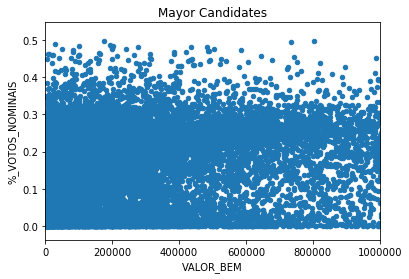

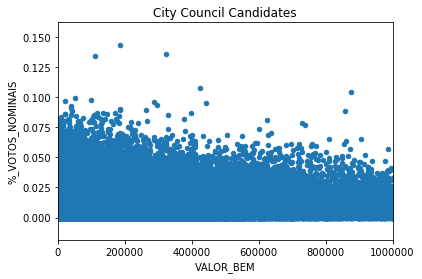

In [29]:
# And plot it. X axis is the estimated value of each candidates wealth, in millions. Y is the % of votes.
# There are only a few candidates with more than R$ 1 million, so I will limit the X axis accordingly
mayor_cands.plot(kind = 'scatter', x = 'VALOR_BEM', y = '%_VOTOS_NOMINAIS', title = 'Mayor Candidates', xlim = (0, 1000000))
council_cands.plot(kind = 'scatter', x = 'VALOR_BEM', y = '%_VOTOS_NOMINAIS', title = 'City Council Candidates', xlim = (0, 1000000))

Nope, it seems... But I believe that we may be seeing a huge distortion, since we are talking about 5000+ very different cities.

#### 2. On average, which party had the richest candidates?


In [30]:
# More straightforward question.
# There are a lot of nans in this particular dataset, so let's get rid of them.
df_notnull = df[df['VALOR_BEM'].notnull()]

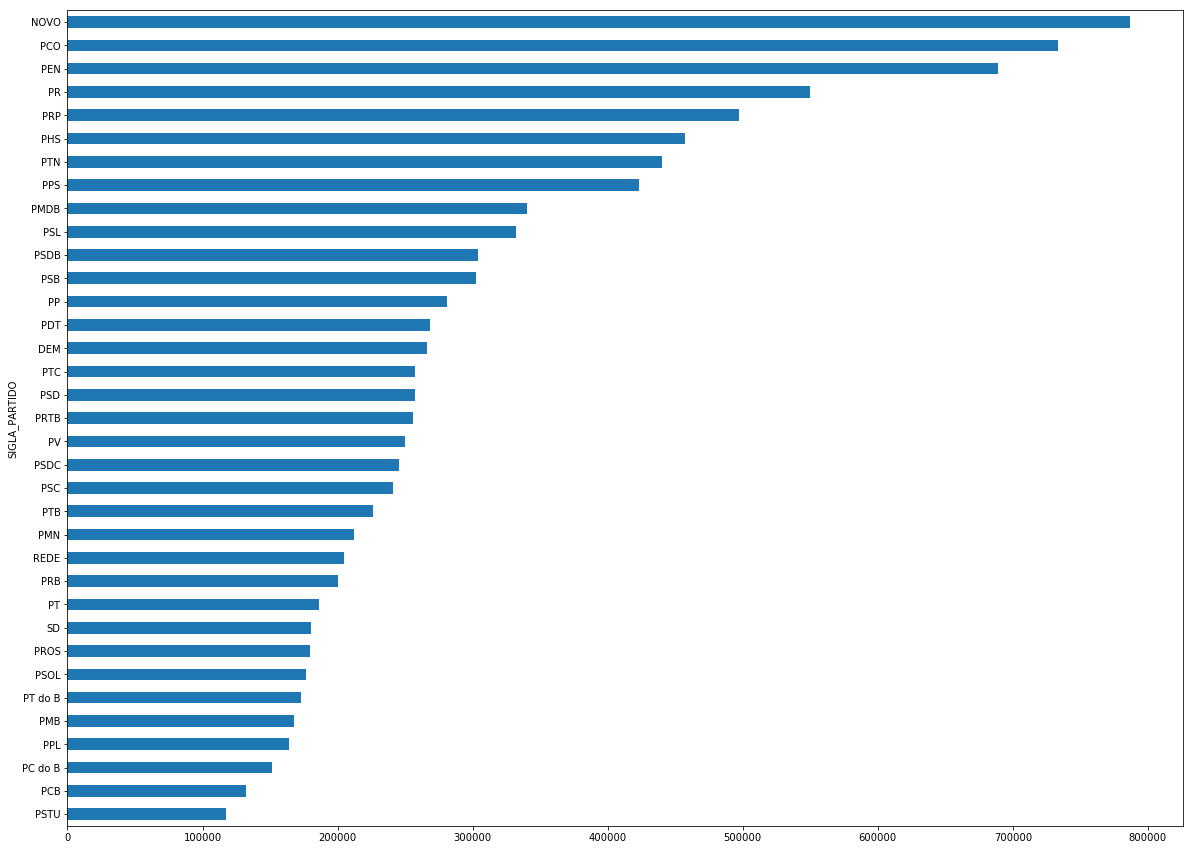

In [31]:
# First, group by party and then calculate an average.
df_notnull.groupby('SIGLA_PARTIDO')['VALOR_BEM'].mean().sort_values().plot(kind = 'barh', figsize = (20,15))

That's  interesting! The richest parties are NOVO ('New', a hardcore neo-liberal, laissez-faire party) and PCO ('Workers' Cause Party', a far-left trotskyst party). They couldn't be further apart in the political spectrum!

But we see a lot of small parties (PCO and Novo included) in the top positions. What if I order them by median, not mean?

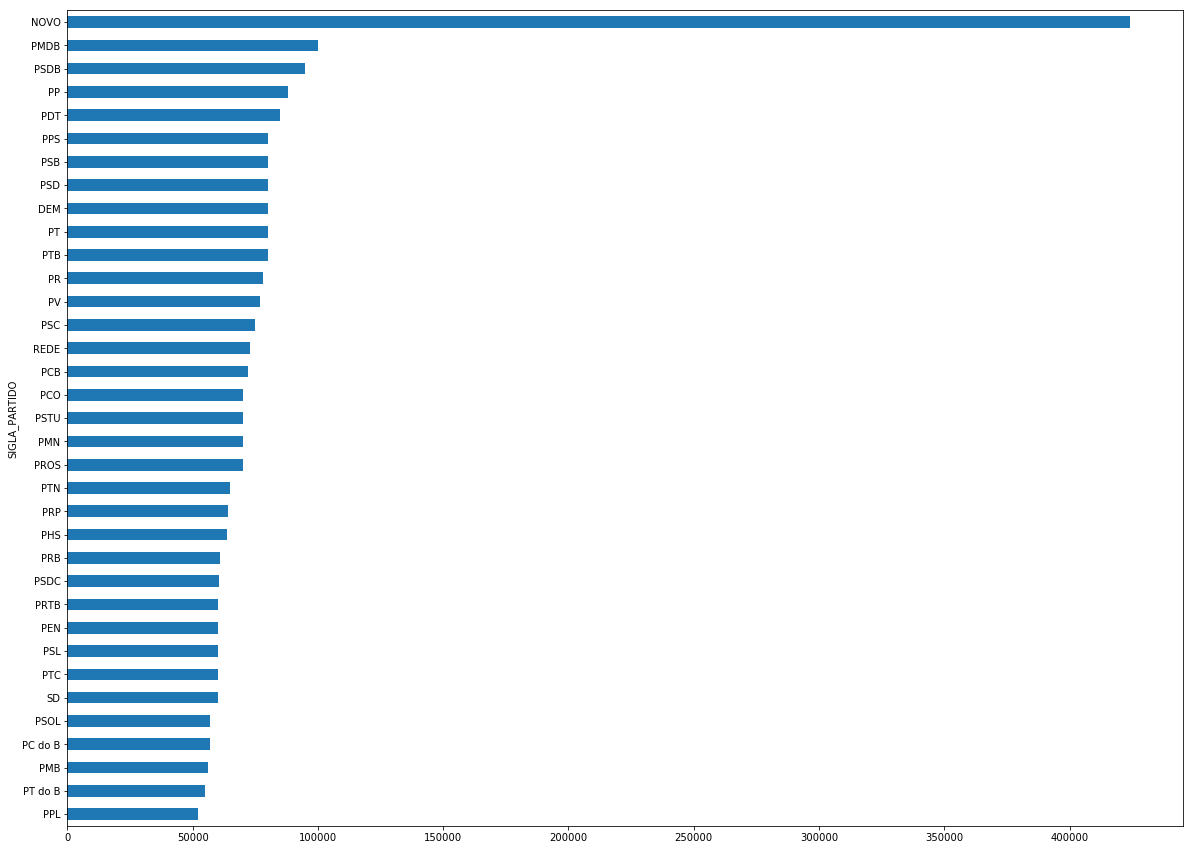

In [32]:
df_notnull.groupby('SIGLA_PARTIDO')['VALOR_BEM'].median().sort_values().plot(kind = 'barh', figsize = (20,15))

The trotskysts go to the bottom half, but the neo-liberals seem even more rich in comparison to the others.

Maybe there's a single rich guy among the communists?

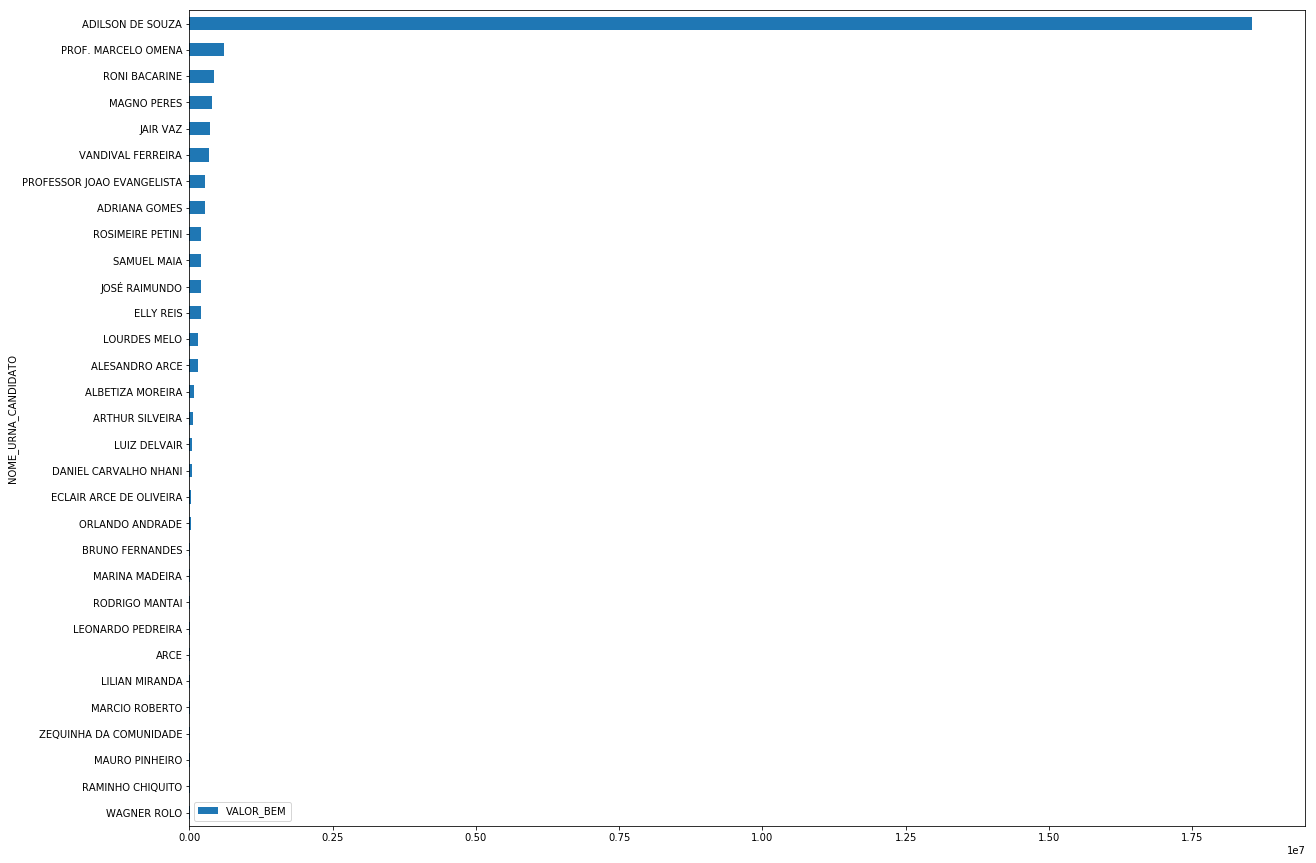

In [33]:
df_notnull[df_notnull['SIGLA_PARTIDO'] == 'PCO'].sort_values(by = 'VALOR_BEM').plot(kind = 'barh', y = 'VALOR_BEM', x = 'NOME_URNA_CANDIDATO', figsize = (20,15))

First, they have really few candidates. Second, one guy, 'Adilson de Souza', is reeeeeally rich.

#### 3. On average, which party had the youngest/oldest candidates?

In [34]:
# Easy, again. 
# But there is really WEIRD data here: negative ages, 999 years old people?
df['IDADE_DATA_ELEICAO'].describe()
        

count    497118.000000
mean         44.506119
std          12.275805
min        -952.000000
25%          36.000000
50%          44.000000
75%          53.000000
max         999.000000
Name: IDADE_DATA_ELEICAO, dtype: float64

In [35]:
# I need to clean this, but don't know how. Maybe assuming that all candidates must be between 18 and 110 years old?
# If they don't fit, then I can treat them as NaNs.

In [36]:
def clean_ages(row):
    if row['IDADE_DATA_ELEICAO'] > 110 or row['IDADE_DATA_ELEICAO'] < 18:
        actual_age = np.nan
    else:
        actual_age = row['IDADE_DATA_ELEICAO']
    return pd.Series({
        'IDADE_DATA_ELEICAO': actual_age
    })

In [37]:
ages = df.apply(clean_ages, axis = 1)

In [38]:
df['IDADE_DATA_ELEICAO'] = ages['IDADE_DATA_ELEICAO']

In [39]:
# Now it makes more sense!
df['IDADE_DATA_ELEICAO'].describe()

count    497091.000000
mean         44.493946
std          11.590570
min          18.000000
25%          36.000000
50%          44.000000
75%          53.000000
max          97.000000
Name: IDADE_DATA_ELEICAO, dtype: float64

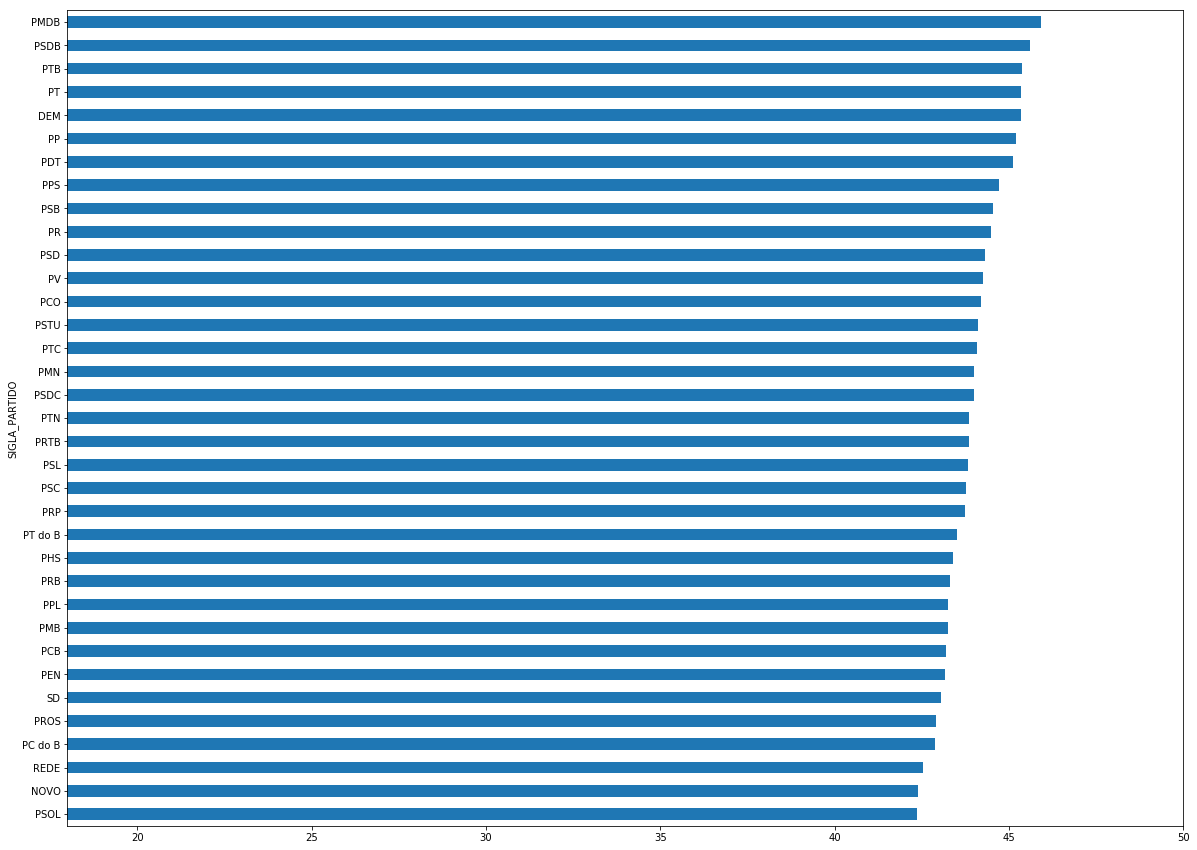

In [40]:
# Time to plot.
df.groupby('SIGLA_PARTIDO')['IDADE_DATA_ELEICAO'].mean().sort_values().plot(kind = 'barh', figsize = (20,15), xlim = (18,50))

PMDB, the party of the current president - Michel Temer, who is 76 himself - is the oldest, on average. 

The younger party is PSOL, a left wing party that has younger leaders such as Marcelo Freixo (50) and Jean Wyllys (43).

#### 4. What is the most common profession among candidates?


In [41]:
# 'Others' is the most common profession. 
# It's followed by 'farmer'. Not very exciting.
df['DESCRICAO_OCUPACAO'].value_counts().head()

OUTROS                        90798
AGRICULTOR                    35856
COMERCIANTE                   32097
SERVIDOR PÚBLICO MUNICIPAL    32020
EMPRESÁRIO                    25864
Name: DESCRICAO_OCUPACAO, dtype: int64

In [42]:
# It may be cool if we see what's the most common profession for each party!
df.groupby('SIGLA_PARTIDO')['DESCRICAO_OCUPACAO'].value_counts(normalize = True).groupby(level=0).head(3)
# Maybe it is not as fun if you don't speak portuguese, though.
# The laissez-faire party is composed mostly of bussinessmen and the Workers' Cause Party has students as their biggest group.

SIGLA_PARTIDO  DESCRICAO_OCUPACAO                            
DEM            OUTROS                                            0.175562
               SERVIDOR PÚBLICO MUNICIPAL                        0.070544
               AGRICULTOR                                        0.068267
NOVO           EMPRESÁRIO                                        0.277778
               ADVOGADO                                          0.118056
               ENGENHEIRO                                        0.104167
PC do B        OUTROS                                            0.201962
               AGRICULTOR                                        0.081603
               SERVIDOR PÚBLICO MUNICIPAL                        0.061488
PCB            OUTROS                                            0.255144
               ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS    0.065844
               PROFESSOR DE ENSINO MÉDIO                         0.049383
PCO            OUTROS                             

#### 5. How many candidates don't have university level education?


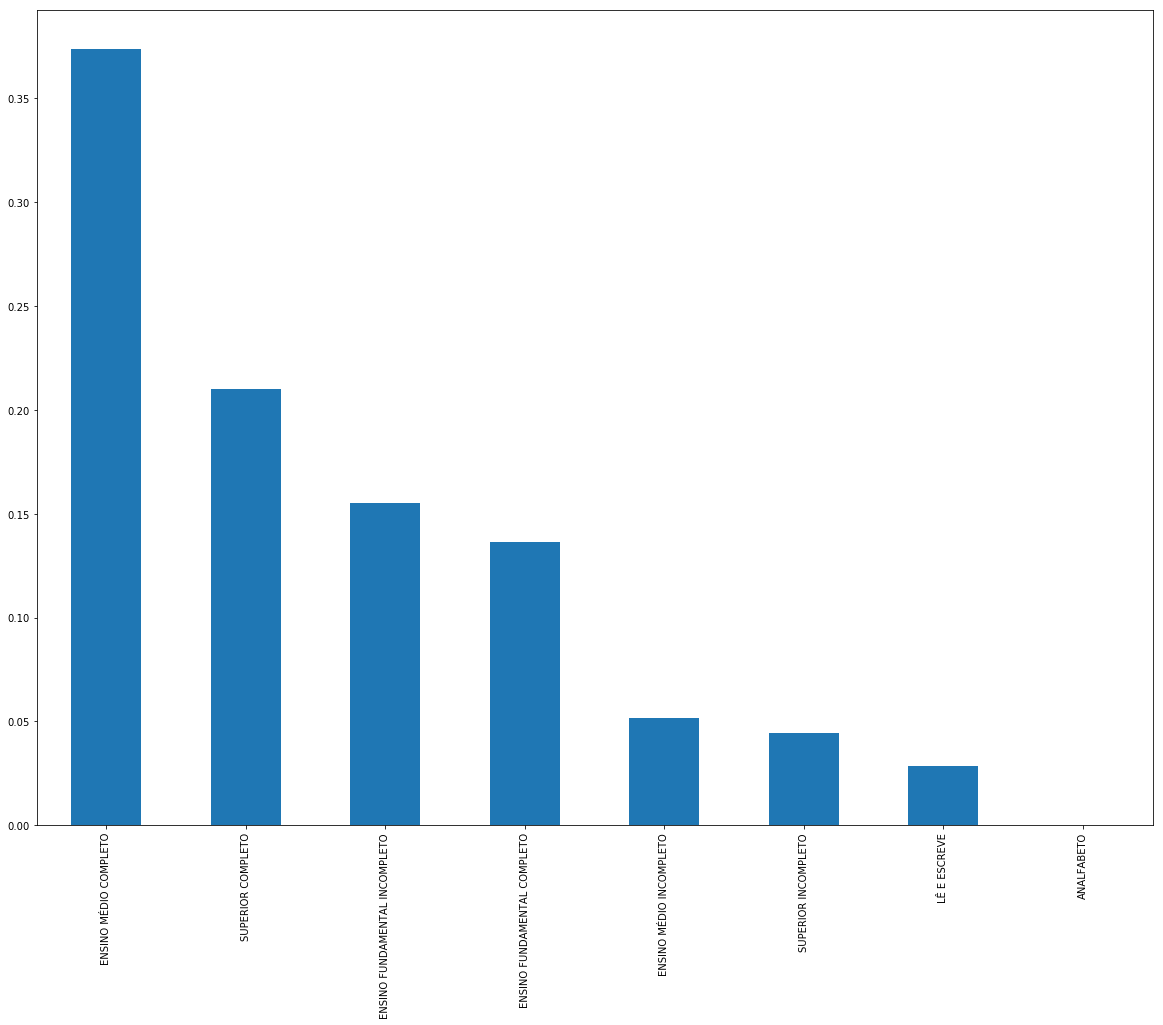

In [43]:
# It's easy to plot, but I wan't in a particular order -- from the least educated to the most educated.
# I can't find a way of doing that, sadly, since it needs to be reordered manually.
df['DESCRICAO_GRAU_INSTRUCAO'].value_counts(normalize = True).plot(kind = 'bar', figsize = (20,15), sort_columns = True)
